<center>
![cover](cover.jpg)
    <h1>  Redes Neurais Dinâmicas com PyTorch</h1>
    <h2> Juliano Viana <juliano@kunumi.ai> @jjviana  </h2>
    </center>


![deep learning history](DeepLearningTimeline.png)

## Redes Neurais: Visão Tradicional
![redes tradicionais](TraditionalNeuralNetwork.png)

## Redes Neurais em 2018

## Redes Neurais em 2018
<center><img src="qanet.png" style="height: 700px; align:center">
<div style="font-size: 8pt">QANET: COMBINING LOCAL CONVOLUTION WITH GLOBAL SELF-ATTENTION FOR READING COMPREHENSION (https://arxiv.org/pdf/1804.09541.pdf)</div></center>
  

<center><img src="lipsync.png" style="height: 700px; align:center">
<div style="font-size: 8pt">Lip Reading Sentences in the Wild* (https://arxiv.org/pdf/1611.05358v1.pdf)</div></center>


<center><img src="reasoning.png">
<div style="font-size: 8pt">A simple neural network module
for relational reasoning (https://arxiv.org/pdf/1706.01427.pdf)</div></center>

# Receita para criar uma Rede Neural 
<br>

## Ingedientes:

<br>
<br>
- Dados
- Estrutura da Rede
- Função Objetivo
- Otimizador
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>




## Modo de preparo

    
    inicialize learning_rate com constante de velocidade de aprendizado

    instancie a estrutura da Rede Neural

    inicialize os parâmetros com valores aleatórios (pequenos)

    repita:

        "forward pass":
            selecione um subconjunto dos dados de treino (minibatch)
            obtenha saídas da rede para os exemplos do minibatch
            compare as saídas obtidas com o esperado (função de perda)
        
        "backward pass":
            calcule o gradiente entre a função de perda e a última camada
            para cada camada da penúltima até a primeira:
                calcule o gradiente entre a camada N-1 e a camada N
            
         "optimize":
            atualize todos os pesos da rede usando a equação (otimizador):
               w = w - learning_rate * gradient
       

    até a convergência do treinamento.



# Frameworks de Deep Learning

![](FrameworksDeepLearning.png)
<br/>

Objetivos: 
- Encapsular os passos "forward", "backward" e "optimize"
- Fornecer blocos de código reusável para a definição da estrutura dos modelos









# Frameworks estáticos: Grafo Computacional
<center>
![tensors flowing](tensors_flowing.gif)
</center>

#  Exemplo: Tensorflow vs PyTorch

In [ ]:
import tensorflow as tf

# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
graph = tf.multiply(x1, x2)

# Intialize the Session
sess = tf.Session()

# Print the result
result=sess.run(graph)
print(result)

# Close the session
sess.close()

In [1]:
# Import PyTorch
import torch

x1=torch.Tensor([1,2,3,4])
x2=torch.Tensor([5,6,7,8])

result=x1*x2

print(result)

tensor([  5.,  12.,  21.,  32.])


# Frameworks dinâmicos

- Menos código
- Execução mais intuitiva
- Depuração mais simples
- Arquiteturas adaptáveis e modulares

# Frameworks estáticos

- Melhor otimização de recursos
- Maior desempenho



# PyTorch
<center>
<img src="PyTorchSite.png" width=60%>
    </center>
- Versão Inicial: Outubro / 2016
- Versão atual: 0.4 (24/04/2018) --> Mudanças significativas na API!!
- Próxima versão: 1.0 ("summer 2018")



<center>
    <img src="karpathy.png" width="70%">
 </center>

## Tensors

In [22]:
import torch

x=torch.Tensor([1,2,3,4])
print(x)

tensor([ 1.,  2.,  3.,  4.])


In [23]:
print(x.size())

torch.Size([4])


In [87]:
x=torch.zeros(10,5)
print(x)

tensor([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])


In [88]:
print(x.size())

torch.Size([10, 5])


In [89]:
x[0][0]=15
x[1][:]=-1
x[0][-1]=-100
print(x)

tensor([[  15.,    0.,    0.,    0., -100.],
        [  -1.,   -1.,   -1.,   -1.,   -1.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.]])


## Automatic Differentiation
<div style="background-color: white">
<img src="NeuralNetworking_transp.gif" width="70%">
</div>

In [90]:
x=torch.ones(1,requires_grad=True)
y=torch.ones(1,requires_grad=True)
print(x)
print(y)
z=3.5*x+y
print(z)


tensor([ 1.])
tensor([ 1.])
tensor([ 4.5000])


In [91]:
z.backward() # <-- Back propagation!
print(x.grad)
print(y.grad)

tensor([ 3.5000])
tensor([ 1.])


In [95]:
with torch.no_grad():
    x-=0.1*x.grad
    y-=0.1*y.grad
z=3.5*x+y
print(z)
z.backward()
    

tensor([-8.7500])


# Exemplo: Regressão Linear em PyTorch

## Definindo o conjunto de dados 


In [5]:
import torch
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
torch.manual_seed(42)

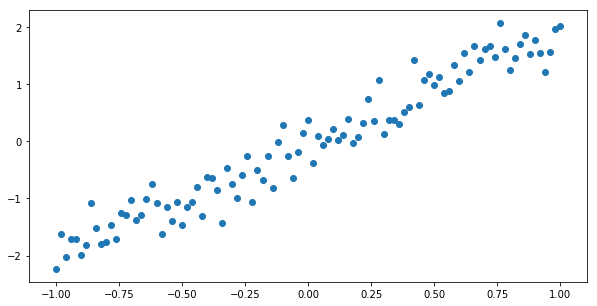

In [6]:
data_X = torch.linspace(-1, 1, 101)
data_Y = 2 * data_X + torch.randn(data_X.size()) * 0.33

plt.scatter(data_X,data_Y)
plt.show()

## Definindo o modelo

In [114]:
A=torch.randn(1,requires_grad=True)
B=torch.randn(1,requires_grad=True)

def model(x):
    return A*x+B

## Treinamento

In [115]:
# Como chegar aos coeficientes A e B a partir dos dados?
# Vamos implementar uma solução usando Stochastic Gradient Descent

learning_rate=0.01
num_training_instances=data_X.size(0)
a_history={}
for i in range(0,10):
    
    epoch_error=0
    
    # Forward
    y=model(data_X)
    error= torch.abs(y-data_Y).sum()  # Erro medio 
    
    # Backward  
    error.backward()
    
    #Optimizer 
    with torch.no_grad():
        a_history[i]=A.item()
        A-=learning_rate*A.grad
        B-=learning_rate*B.grad
    
    A.grad.zero_()
    B.grad.zero_()
        
    print("Epoch %d , error %.3f"%(i,error/num_training_instances))    
        

Epoch 0 , error 0.887
Epoch 1 , error 0.528
Epoch 2 , error 0.329
Epoch 3 , error 0.245
Epoch 4 , error 0.273
Epoch 5 , error 0.364
Epoch 6 , error 0.460
Epoch 7 , error 0.460
Epoch 8 , error 0.478
Epoch 9 , error 0.443


## Avaliação

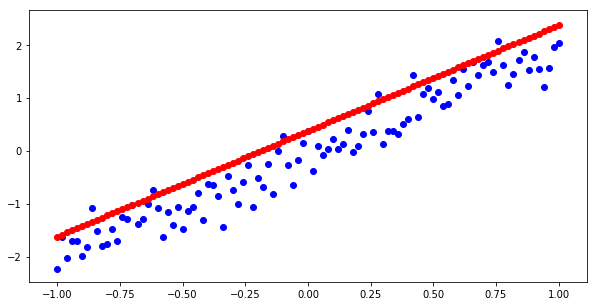

In [116]:
pred_Y=model(data_X)
plt.scatter(data_X,data_Y,color="blue")
plt.scatter(data_X,pred_Y.detach().numpy(),color="red")

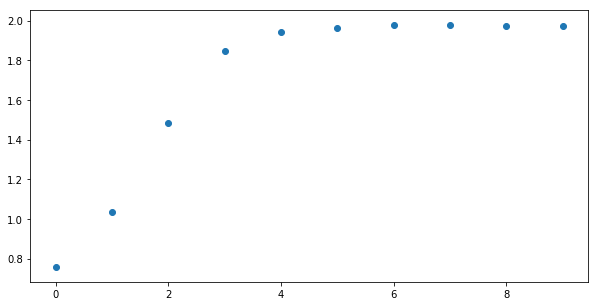

In [117]:
plt.scatter(a_history.keys(),a_history.values())

# Exemplo 2: Predição de Diabetes

## Leitura do dataset

In [148]:
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Pre-processamento:
- Separa features e target
- Converte target de [0,1] para [-1,1]
- Normaliza features para [0,1]

In [149]:
from sklearn import preprocessing

diabetes['Outcome'].replace(to_replace=[0],value=-1,inplace=True)

diabetes_features=diabetes.loc[:,diabetes.columns!='Outcome']

diabetes_target=diabetes.loc[:,diabetes.columns=='Outcome'].values

# Converte valores para a mesma escala (entre 0 e 1)

minmax_scale = preprocessing.MinMaxScaler().fit(diabetes_features)
diabetes_features=minmax_scale.transform(diabetes_features)


## Divisão do Dataset
- Cria splits de treino e teste
- Converte valores de ndarray para Tensor

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(diabetes_features,diabetes_target)

X_train_tensor=torch.from_numpy(X_train).float()
Y_train_tensor=torch.from_numpy(Y_train).float()

print("Size of X feature set: ")
X_train_tensor.size()

Size of X feature set: 


torch.Size([576, 8])

## Define Rede Neural 

In [151]:
import torch.nn.functional as F
class DiabetesPredictionModel(torch.nn.Module):
     def __init__(self):
            super(DiabetesPredictionModel, self).__init__()
        
            self.linear_projection1=torch.nn.Linear(8,2)
            self.linear_projection2=torch.nn.Linear(2,1)  
            
     def forward(self,x):
        
        output=F.tanh(self.linear_projection1(x))
        output=F.tanh(self.linear_projection2(output))

        return output
    

    

### Pytorch Building Blocks
<img src="torch_nn.png" height=600px >

<img src="linear.png" width="70%">

## Instancia Rede Neural e hiperparâmetros

In [158]:
model=DiabetesPredictionModel()
minibatch_size=32
learning_rate=1e-2

with torch.no_grad():
    for param in model.parameters():
        param.uniform_(0,0.01)

from sklearn.metrics import accuracy_score

import torch.optim as optim

optimizer=optim.Adam(model.parameters(),0.01)

## Loop de Treino

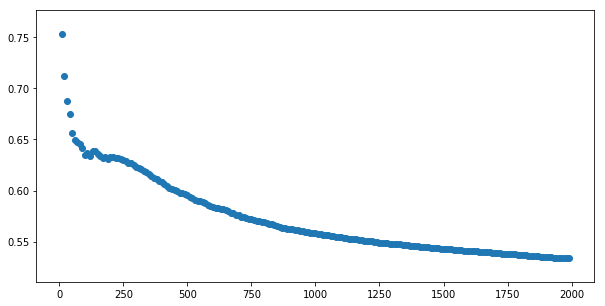

In [159]:
losses={}
total_loss=0
for i in range(0,2000):
    # Seleciona um minibatch aleatório a partir do treino
    minibatch_index=torch.randperm(X_train_tensor.size(0))
    minibatch_index=minibatch_index[:minibatch_size]
    minibatch_x=X_train_tensor[minibatch_index]
    minibatch_y=Y_train_tensor[minibatch_index]

    #Forward pass
    output=model(minibatch_x)
    loss=F.soft_margin_loss(output,minibatch_y)
    
    # Backward pass
    loss.backward()
    total_loss+=loss.item()
    # Optimizer pass
    optimizer.step()
    optimizer.zero_grad()
    
    if i>0 and i%10==0:
        losses[i]=total_loss/i
    
plt.scatter(losses.keys(),losses.values())

<img src="soft_margin_loss.png" width="70%">

## Avaliação do modelo

In [160]:
def evaluate(model):
    with torch.no_grad():
        # Avalia no conjunto de testes
        X_test_tensor=torch.from_numpy(X_test).float()
        Y_test_tensor=torch.from_numpy(Y_test).float()

        y_train_pred=model(X_train_tensor)
        y_test_pred=model(X_test_tensor)

        train_accuracy=accuracy_score(Y_train_tensor.gt(0),y_train_pred.gt(0))
        test_accuracy=accuracy_score(Y_test_tensor.gt(0),y_test_pred.gt(0))
        print("Train accuracy: %.2f%%"%(100*train_accuracy))
        print("Test accuracy: %.2f%%"%(100*test_accuracy)) 
evaluate(model)


Train accuracy: 79.86%
Test accuracy: 72.40%


## Salvando o modelo 

In [161]:
torch.save(model.state_dict(),'./models/diabetes_model.dat')

## Carregando o modelo

In [162]:
model2=DiabetesPredictionModel()
model2.load_state_dict(torch.load('./models/diabetes_model.dat'))
evaluate(model2)

Train accuracy: 79.86%
Test accuracy: 72.40%


## Visualização da representação interna

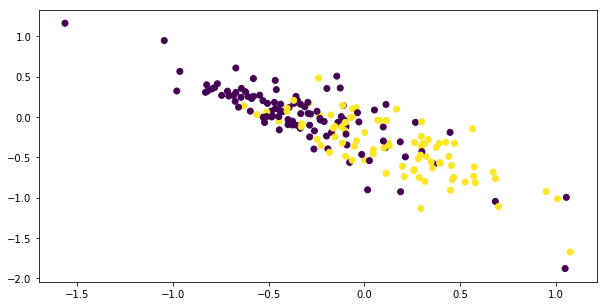

In [164]:
X_test_tensor=torch.from_numpy(X_test).float()
Y_test_tensor=torch.from_numpy(Y_test).float()
network_representation=model.linear_projection1(X_test_tensor).detach()

plt.scatter(x=network_representation[:,0].numpy(),
            y=network_representation[:,1].numpy(),
            c=Y_test_tensor.gt(0).squeeze())